# 05. 소프트맥스 회귀 (Softmax Regression)
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'

## 개념정리

---
### **소프트맥스 회귀**
---


<h1><center>$y = softmax(wx + b)$</center></h1>

#### **소프트맥스  구현**




<h1><center>$softmax(\vec{x}) = \frac{1}{\sum^d_{j=1}e^{(x_j)}}[e^{x_1}, e^{x_2}, ... e^{x_d}]$</center></h1>

In [ ]:
#X=[1,2,2]
#X=[[1,2,2],          [[e^1,e^2,e^2]*norm
#   [1,1,1]]    ->      [e^1,e^1,e^1]*norm]

def softmax(X):
  expX = np.exp(X)
  sumX = np.sum(expX, axis =1 ).reshape(len(X),1)
  return expX/sumX


* 예제 
  * $x_1 = (2,1,1)$
  * $x_2 = (2,5,3)$
  * $x_3 = (-1,2,5)$

In [ ]:
x1 = np.array([2,1,1]).reshape(1,3)
print(softmax(x1))
x2 = np.array([2,5,3]).reshape(1,3)
print(softmax(x2))
x3 = np.array([-1,2,5]).reshape(1,3)
print(softmax(x3))

[[0.57611688 0.21194156 0.21194156]]
[[0.04201007 0.84379473 0.1141952 ]]
[[0.00235563 0.04731416 0.95033021]]


* 시각화

#### **데이터 정의**


|라운드점수|결과|
|------|---|
|-3|패배|
|-2|패배|
|-1|패배|
|0|무승부|
|1|무승부|
|2|승리|
|3|승리

In [ ]:
X=np.array([-3,-2,-1,0,1,2,3]).reshape(7,1)
Y=np.array([0,0,0,1,1,2,2]).reshape(7,1)
X.shape,Y.shape

((7, 1), (7, 1))

#### **원-핫 벡터(One-hot vector)**
* `sklearn` 의 `preprocessing.OneHotEncoder` 을 이용해 원핫 벡터로 변경

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Y_onehot = encoder.fit_transform(Y)
print(Y_onehot, Y_onehot.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]] (7, 3)


#### **모델 구현**

In [ ]:
def model(X):
  W=np.random.random(3).reshape(1,3)   # W의 shape(1,3)
  b=np.random.random(3).reshape(1,3)   # b의 shape(1,3)
  return softmax(np.matmul(X,W)+b)

#### **예측**

In [ ]:
Y_pred= model(X)
Y_pred,Y_pred.shape

(array([[0.63758245, 0.1834942 , 0.17892334],
        [0.58043032, 0.20481019, 0.21475949],
        [0.52070685, 0.22527356, 0.25401958],
        [0.46005893, 0.2440315 , 0.29590957],
        [0.40025733, 0.2603078 , 0.33943487],
        [0.34299465, 0.27349583, 0.38350952],
        [0.28969944, 0.28322168, 0.42707887]]), (7, 3))

* 시각화

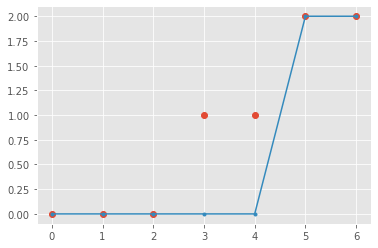

In [ ]:
plt.plot(Y, marker = 'o',linestyle='')
plt.plot(np.argmax(Y_pred, axis=1),marker = '.')
plt.show()

---
### **비용함수 (Cost function)**
---


####**크로스 엔트로피 (Cross Entropy)**


<h1><center>$CrossEntropy = -\sum^k_{i=1} y_i log(\hat{y_i})$</center></h1>






* 구현

In [ ]:
def CE(y,y_pred):
  return -np.sum(y*np.log(y_pred))

In [ ]:
for y_onehot,y_pred in zip(Y_onehot,Y_pred):
  print(CE(y_onehot,y_pred))


0.4500716722034189
0.5439855211838359
0.6525680625922837
1.4104579756259192
1.345890504258122
0.9583908425770992
0.8507865684547605


---
### **sklearn 을 이용한 모델구현**
---

* `LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression





#### **모델학습**

* 모델 불러오기

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression(multi_class='multinomial')

* 학습

In [ ]:
model.fit(X,Y.flatten())

LogisticRegression(multi_class='multinomial')

* 예측

In [ ]:
Y_pred = model.predict(X)
print(Y_pred, Y_pred.shape)

[0 0 0 1 1 2 2] (7,)


* 시각화

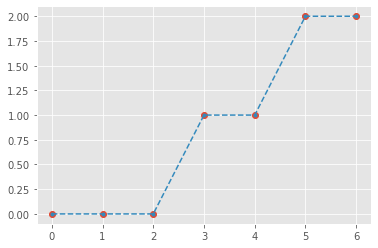

In [ ]:
plt.plot(Y,marker='o',linestyle='')
plt.plot(Y_pred,marker='.',linestyle='--')
plt.show()

#### **성능평가**

* 혼돈행렬(Confusion matrix)
  * `sklean.metrics.confusion_matrix`

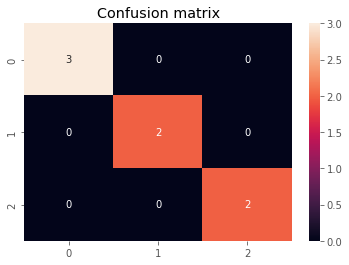

In [ ]:
from sklearn import metrics
import seaborn as sns
m = metrics.confusion_matrix(Y,Y_pred)
plt.title("Confusion matrix")
sns.heatmap(m,annot=True)
plt.show()

* 정확도 (Accuracy)
  * `model.score`

In [ ]:
model.score(X,Y)

1.0

## **과제**


---
### **과제01**
---

공부시간, 집중도, 수면시간을 이용해서 합격 여부를 추측하세요. `sklearn` 라이브러리의 `LogisticRegression`를 시용합니다. 


|공부시간|집중도|수면시간|합격여부|
|------|---|---|---|
|0|1|9|불합격|
|1|1|8.5|불합격|
|2|2|8|불합격|
|3|4|8|유예|
|4|3|7|유예|
|5|5|7.5|유예|
|6|6|7|유예|
|7|6|6|합격|
|8|7|7|합격|
|9|6|6.5|합격|

* 데이터 정의

In [ ]:
X=np.array([[0,1,2,3,4,5,6,7,8,9],[1,1,2,4,3,5,6,6,7,6],[9,8.5,8,8,7,7.5,7,6,7,6.5]]).swapaxes(0,1)
Y=np.array([0,0,0,1,1,1,1,2,2,2]).reshape(10,1)
print(X.shape,Y.shape)
print(X,Y)

(10, 3) (10, 1)
[[0.  1.  9. ]
 [1.  1.  8.5]
 [2.  2.  8. ]
 [3.  4.  8. ]
 [4.  3.  7. ]
 [5.  5.  7.5]
 [6.  6.  7. ]
 [7.  6.  6. ]
 [8.  7.  7. ]
 [9.  6.  6.5]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]]


#### **모델학습**

* 모델 불러오기

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression(multi_class='multinomial')

* 학습

In [ ]:
model.fit(X,Y.flatten())

LogisticRegression(multi_class='multinomial')

* 예측

In [ ]:
Y_pred = model.predict(X)
print(Y_pred, Y_pred.shape)

[0 0 0 1 1 1 1 2 2 2] (10,)


* 시각화

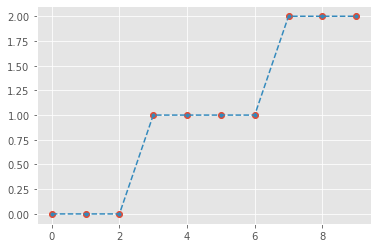

In [ ]:
plt.plot(Y,marker='o',linestyle='')
plt.plot(Y_pred,marker='.',linestyle='--')
plt.show()

#### **성능평가**

* 혼돈행렬(Confusion matrix)
  * `sklean.metrics.confusion_matrix`

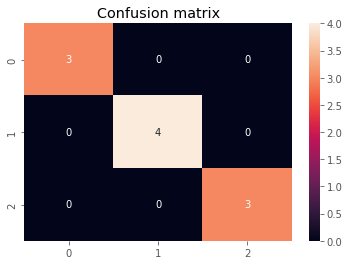

In [ ]:
from sklearn import metrics
import seaborn as sns
m = metrics.confusion_matrix(Y,Y_pred)
plt.title("Confusion matrix")
sns.heatmap(m,annot=True)
plt.show()

* 정확도 (Accuracy)
  * `model.score`

In [ ]:
model.score(X,Y)

1.0

---
### **과제02**
---

`Pandas` 데이터셋의  `penguins`를 사용합니다. 펭귄의 종을 예측해 보세요 

In [ ]:
import seaborn as sns
import pandas
df_pre = sns.load_dataset("penguins")
df_pre.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
def preprocess_penguins(df_pre):

  #범주형 수치화(성별,섬,종)
  mask_m = df_pre["sex"] =='Male'
  mask_f = df_pre["sex"] =='Female'
  df_pre.loc[mask_m, "sex"] =0
  df_pre.loc[mask_f, "sex"] =1

  mask_i_t = df_pre["island"] =='Torgersen'
  mask_i_b = df_pre["island"] =='Biscoe'
  mask_i_d = df_pre["island"] =='Dream'
  df_pre.loc[mask_i_t, "island"] =0
  df_pre.loc[mask_i_b, "island"] =1
  df_pre.loc[mask_i_d, "island"] =2

  mask_s_a = df_pre["species"] =='Adelie' 
  mask_s_c = df_pre["species"] =='Chinstrap'
  mask_s_g = df_pre["species"] =='Gentoo'
  df_pre.loc[mask_s_a, "species"] =0
  df_pre.loc[mask_s_c, "species"] =1
  df_pre.loc[mask_s_g, "species"] =2
  
  #min-max정규화
  for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
  #(object->int)
  
  #결측값 줄삭제
  df_pre = df_pre.dropna(axis=0)
  return df_pre

In [ ]:
train=preprocess_penguins(df_pre)
df=train.to_numpy()
X = df[:, 1:]
Y = df[:, 0]
print(X.shape,Y.shape)

(333, 6) (333,)


In [ ]:
train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,0.254545,0.666667,0.152542,0.291667,0
1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,0,0,0.298182,0.583333,0.389831,0.152778,1
4,0,0,0.167273,0.738095,0.355932,0.208333,1
5,0,0,0.261818,0.892857,0.305085,0.263889,0


In [ ]:
Y = np.array(Y, dtype='int')
X[0] = np.array(X[0], dtype='int')
X[-1] = np.array(X[-1], dtype='int')

In [ ]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, Y)
Y_pred = model.predict(X)


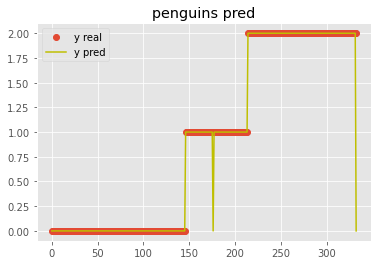

In [ ]:
plt.plot(Y ,marker='o',linestyle='',label='y real')
plt.plot( Y_pred,c='y',label="y pred")
plt.title("penguins pred")
plt.legend()
plt.show()

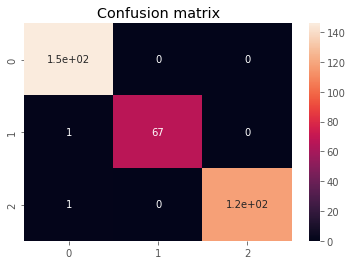

[[146   0   0]
 [  1  67   0]
 [  1   0 118]]


In [ ]:
from sklearn import metrics
import seaborn as sns
m = metrics.confusion_matrix(Y,Y_pred)
plt.title("Confusion matrix")
sns.heatmap(m,annot=True)
plt.show()
print(m)

In [ ]:
model.score(X,Y)

0.993993993993994